In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sssm import SSSM

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

In [2]:
A = {0:np.array([[1,1],[0,1]]), 1:np.array([[1,-1],[0,1]]), 2:np.array([[1,0],[0,1]])}
B = {0:np.array([[1,0]]), 1:np.array([[1,0]]), 2:np.array([[1,0]])}
K,S,O = 3, 2, 1
pi_m = {0:np.array([0,0.8]), 1:np.array([0,0.8]), 2:np.array([0,0.8])}
pi_s = {0:np.eye(S)*0.1, 1:np.eye(S)*0.1, 2:np.eye(S)*0.1}
E_h = {0:np.eye(S)*0.4, 1:np.eye(S)*0.6, 2:np.eye(S)*0.5}
E_o = {0:0.4, 1:0.5, 2:0.5}

In [3]:
M = np.zeros((K,K))
p0 = np.ones(K)/K
for i in range(K):
    for j in range(K):
        if i == j:
            M[i,j] = 0.9
        else:
            M[i,j] = 0.1/(K-1)

In [4]:
sssm = SSSM(M,p0,A,B,pi_m,pi_s,K,S,O,E_h,E_o)

In [5]:
d_states,c_states,observations = sssm.generate_data(250)

In [6]:
print d_states

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [7]:
print c_states

[array([-0.07200504,  0.1797983 ]), array([ 0.28030938, -1.16394739]), array([-0.81017557, -0.27052784]), array([-0.45754563,  0.22241205]), array([-0.83099935, -0.17275208]), array([-0.51498201,  0.14876147]), array([0.94504582, 0.3070995 ]), array([ 0.66549859, -1.24640047]), array([ 2.96406866, -1.00686207]), array([ 2.61370425, -1.62840092]), array([ 3.85525441, -1.65685662]), array([ 4.78938587, -2.40096535]), array([7.12658295, 0.26882899]), array([7.03943056, 0.05016348]), array([7.65003556, 0.88646371]), array([ 6.47710077, -0.76904959]), array([ 6.76535418, -1.25018991]), array([ 9.04648061, -0.55379901]), array([8.18629923, 0.88213928]), array([8.61341245, 1.27661217]), array([7.01356955, 1.53337354]), array([4.37357401, 2.0000921 ]), array([2.33467885, 0.91006026]), array([0.94624777, 0.8642074 ]), array([0.02578954, 1.32475467]), array([-2.35952048,  0.83838329]), array([-2.68828457, -0.40559702]), array([-2.07610662, -0.12244704]), array([-1.77724658, -0.14102548]), array(

In [8]:
print observations

[array([0.43171663]), array([-0.35740709]), array([-0.6520337]), array([-0.54174807]), array([-1.00456115]), array([0.10444343]), array([0.42454801]), array([0.78454107]), array([2.21580711]), array([2.29044228]), array([4.68061601]), array([5.74412751]), array([6.30394649]), array([7.06904531]), array([7.58787465]), array([6.94042905]), array([6.99586623]), array([8.95149212]), array([7.24454858]), array([8.5677364]), array([7.81937826]), array([4.4195971]), array([2.77634826]), array([1.00929666]), array([0.19753827]), array([-2.21752099]), array([-2.83610004]), array([-1.79821082]), array([-1.52174486]), array([-0.98037892]), array([-1.55408981]), array([0.07947044]), array([0.60163081]), array([1.63942947]), array([1.66367615]), array([2.01674105]), array([0.90540873]), array([0.6046701]), array([0.94726713]), array([-0.15208091]), array([-3.17728461]), array([-4.78349252]), array([-5.45536267]), array([-5.22649863]), array([-8.46289464]), array([-8.30174604]), array([-11.391271]),

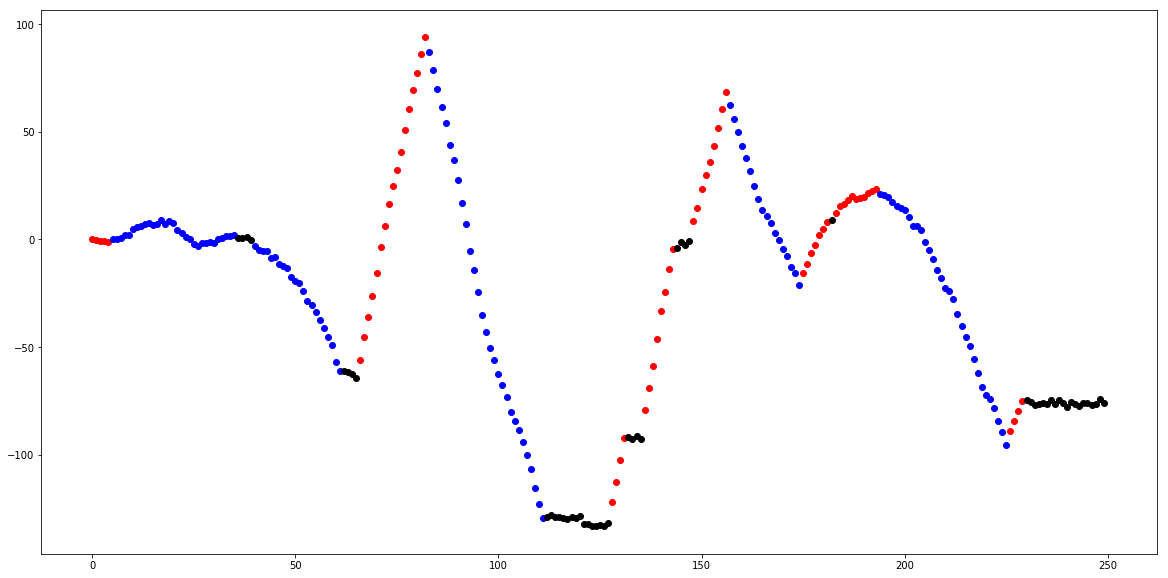

In [9]:
plt.figure(figsize=(20,10))
time = 0
for obs in observations:
    plt.scatter(time, obs[0], color=["red","blue","black"][d_states[time]])
    time += 1

In [10]:
h, H ,gamma = sssm.structured_vi(observations,num_iterations=20)

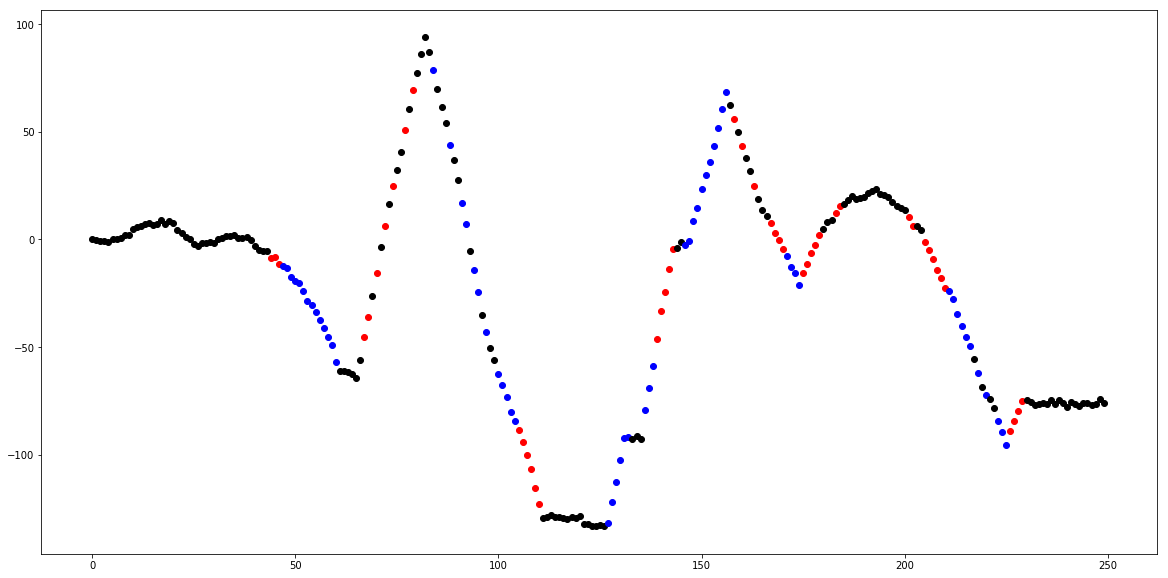

In [11]:
plt.figure(figsize=(20,10))
time = 0
for obs in observations:
    plt.scatter(time, obs[0], color=["red","blue","black"][np.argmax(gamma[:,time])])
    time += 1

Although there are some mismatches for the first and second dynamics, the above code works correctly. Because negative velocity with second dynamics behave in the same way that positive velocity with first dynamics

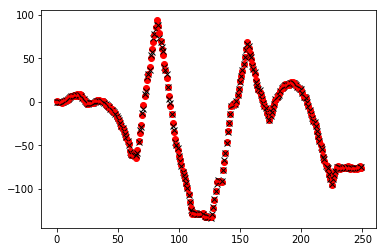

In [12]:
for i in range(len(observations)):
    plt.plot(i,observations[i][0],'ro')
    plt.plot(i,h[i][0],'kx')
plt.show()